<a href="https://colab.research.google.com/github/azazbutt7/streamlit-example/blob/master/cs_455_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>CS-455 Machine Learning - Semester Project</b></h1>

### **Submitted To**:  Syed Qamar Askari
### **Topic:** Time Series Analysis and Forecasting

#### **a. About the project**:
The project is based on **TSA** (Time Series Analysis) and **TSF** (Time Series Forecasting), intended to make predictions on real time data. In this notebook, a complete machine learning model is developed with analysis, data exploration, visualization, cleaning, preprocessing and to make **regression** model fit to our data.

#### **b. Data Used For Model Fitting:** 
The data has been tacken from Kaggle's Competition Data, and the data is concerned with <b>Time Series</b>. The data is **Bluebook for Buldozers,** in which a machine learning model is fitted to predict the price of buldozers wrt time. The Dataset can be accessed from here:
"https://www.kaggle.com/c/bluebook-for-bulldozers"    

#### **c. Techniques Used for Machine Learning Model:**
The outcome that is supposed to come is a continuous output, so we will be using **Regression Techniques** to fit our model to data. Following are the techniques used:

1.   Linear Regression
2.   Polynomial Regression
2.   Random Forest Regression

#### **d. Project Flow:**


1.   Importing necessary Python Libraries for data preprocessing, modelling, cleaning and visualization
2.   **EDA** (Exploratory Data Analysis):<br>
        a. Data Analysis<br>
        b. Data Exploration<br>
        c. Data Wrangling<br> 
        d. Feature Exploration
3.    Data Cleaning, Preprocessing and Visualization<br>
4.    (Repitition of Steps 2 & 3 for making sure that data is ready for modelling)
5.    Data Splicing<br>
      (Making training and testing splits) or <b>K-fold cross validation</b>

5.    Model Selection<br> 
      a. Selecting Models for Data
      b. Fitting Model to Data
      c. Prediction of Model on unseen examples
      d. Saving the model output
      e. Calculating model accuracy on training and testing data

6.    Model Evaluation
      a. MSE (Mean Squared Error)
      b. MAE (Mean Absolute Error)
      c. Other evaluation metics




## **1. Importing nexessary Python Libraries**
First, we need to import the needed Python Libraries for data analysis, preprocessing and visualization 

In [203]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score, accuracy_score, mean_squared_log_error, recall_score, precision_score, mean_absolute_error, r2_score

## **2. Data Exploration (EDA)**

In [128]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning /TrainAndValid.csv', 
                   low_memory=False)
data.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
# getting the shape of data 
data.shape

(412698, 53)

As given by above cell, our data has 412698 training examples and 53 features

In [130]:
# getting information about data
# data.info()

In [131]:
len(data.columns)

53

In [132]:
# data.columns

In [133]:
# data['saledate']

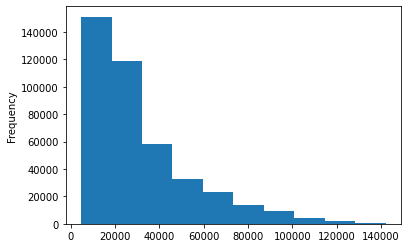

In [134]:
# fig, axes = plt.subplots()
# axes.scatter(data['saledate'][:1000], data['SalePrice'][:1000])
data['SalePrice'].plot.hist()

**<h4>Date Parsing**

When we work with Time Series Data, we must care to parse dates, i.e. to enrich the date and time components as much as possible. We have to load the data again and then load with data parsing.


In [135]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning /TrainAndValid.csv',
                   low_memory=False, parse_dates=['saledate'])


In [136]:
data['saledate'].dtype

dtype('<M8[ns]')

In [137]:
data['saledate'].head(1)

0   2006-11-16
Name: saledate, dtype: datetime64[ns]

Text(0, 0.5, 'Price')

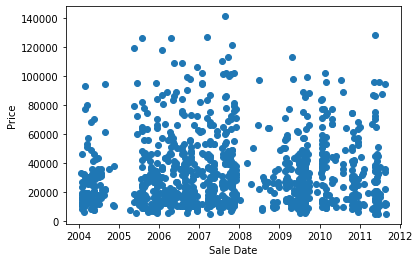

In [138]:
# plot the data to visualize the trend
fig, axes = plt.subplots()
axes.scatter(data['saledate'][:1000], data['SalePrice'][:1000])
plt.xlabel('Sale Date')
plt.ylabel('Price')

In [139]:
# data['saledate'].head(3)

When we are working with Time Series Data, it would be a better option to sort it by dates. 
 

In [140]:
data.sort_values(by=['saledate'], inplace=True, ascending=True)
data['saledate'].head(5)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

Now, our data has been sorted by dates in ascending order. 

#### **Making a Copy of initial Data Frame (Feature Engineering)**

```
# This is formatted as code
```


Since we are dealing with Time Series Data, so it's necessary that we should make a copy of initial data so that if we make changes in data, the inital data remains unchanged/

In [141]:
# data.head(4)
# making a copy of our data and saving it to a temporary variable
data_temp = data.copy()

In [142]:
data_temp.head(1)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN


In [143]:
data_temp['saledate'].head(1)

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [144]:
# checking the amount of null values in data
data.isnull().sum().to_numpy()

array([     0,      0,      0,      0,      0,  20136,      0, 265194,
       339028,      0,      0,      0, 140727, 354031, 337882, 216605,
            0,      0,      0,      0, 305611,    334, 214983, 331602,
       259970, 331602, 224691, 331602, 386715, 386715, 386715, 386715,
        82565, 386715, 305753, 386704, 386715, 315060, 192019, 367724,
       367823, 367823, 310505, 309782, 310437, 310366, 310437, 310505,
       331986, 330823, 330821, 341134, 341176])

#### Adding Datetime Parameters for datetime columns

In [145]:
# data_temp["saleYear"] = data_temp.saledate.dt.year
data_temp['saledate'][:1]

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [146]:
data_temp['saledate'][:1].dt.day

205615    17
Name: saledate, dtype: int64

In [147]:
data_temp["saleYear"] = data_temp["saledate"].dt.year
data_temp["saleMonth"] = data_temp["saledate"].dt.month
data_temp["saleDay"] = data_temp["saledate"].dt.day
data_temp["saleDayOfWeek"] = data_temp["saledate"].dt.dayofweek
data_temp["dayOfYear"] = data_temp["saledate"].dt.dayofyear

In [148]:
# data_temp.head(1).T

Now as we have enriched our dataframe, and have included some extra features, we don't need the **saledate** column anymore. We are now removing that column from data. 

In [149]:
data_temp.drop("saledate", axis=1, inplace=True)

In [150]:
data_temp.state.value_counts

<bound method IndexOpsMixin.value_counts of 205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: object>

In [151]:
data_temp.head(1)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,dayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17


We have done enough EDA, let's make a machine learning model out of it. 

## **3. Modelling**
In this section, we will fit a machine learning model to our data. Our machine needs numerical values to be fed into, so we will first convert the categorical inputs in our data to numerical values.

In [152]:
len(data_temp)

412698

In [153]:
model = RandomForestRegressor(n_jobs=1, random_state=5)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [154]:
# checking the sum of all null values in each column of our data
data_temp.isnull().sum().to_numpy()

array([     0,      0,      0,      0,      0,  20136,      0, 265194,
       339028,      0,      0, 140727, 354031, 337882, 216605,      0,
            0,      0,      0, 305611,    334, 214983, 331602, 259970,
       331602, 224691, 331602, 386715, 386715, 386715, 386715,  82565,
       386715, 305753, 386704, 386715, 315060, 192019, 367724, 367823,
       367823, 310505, 309782, 310437, 310366, 310437, 310505, 331986,
       330823, 330821, 341134, 341176,      0,      0,      0,      0,
            0])

In [155]:
# checking the sum of all NaN values in our data
data_temp.isna().sum().to_numpy()

array([     0,      0,      0,      0,      0,  20136,      0, 265194,
       339028,      0,      0, 140727, 354031, 337882, 216605,      0,
            0,      0,      0, 305611,    334, 214983, 331602, 259970,
       331602, 224691, 331602, 386715, 386715, 386715, 386715,  82565,
       386715, 305753, 386704, 386715, 315060, 192019, 367724, 367823,
       367823, 310505, 309782, 310437, 310366, 310437, 310505, 331986,
       330823, 330821, 341134, 341176,      0,      0,      0,      0,
            0])

**<h4>Converting the data into categories**<br>
Now, we are converting all our data into numbers, using Pandas Categories

In [156]:
categorical = [i for i in data_temp.columns if data_temp.columns.dtype != float]
len(categorical)

57

In [157]:
pd.api.types.is_string_dtype(data_temp['UsageBand'])

True

In [158]:
# finding each column with a string in it
for label, content in data_temp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [159]:
# turning all categorical inputs to numbers
for label, conten in data_temp.items():
  if pd.api.types.is_string_dtype(content):
    data_temp[label] = content.astype("category").cat.as_ordered()

In [160]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [161]:
data_temp.state.value_counts

<bound method IndexOpsMixin.value_counts of 205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: object>

In [162]:
# data_temp['state'].cat.codes

In [163]:
data_temp.isnull().sum()/len(data_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

<h4><b>Saving the preprocessed data</b> 

In [164]:
# saving the cleaned and preprocessed data to a new file so that we may again load it and then
# make a new model
data_temp.to_csv('bluebook-buldozers-preprocessed.csv')

In [165]:
data_preprocessed = pd.read_csv('/content/bluebook-buldozers-preprocessed.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [166]:
data_preprocessed.head(1)

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,dayOfYear
0,205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17


### Filling the Missing Values in our Data

#### **Fill Missing Numeric Values**

In [168]:
# printing just numerical values in our data
for label, content in data_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
dayOfYear


In [169]:
data_temp.ModelID

205615     8434
274835    10150
141296     4139
212552     8591
62755      4089
          ...  
410879     5266
412476    19330
411927    17244
407124     3357
409203     4701
Name: ModelID, Length: 412698, dtype: int64

In [171]:
# checking for which column in our data, the numeric value is missing
for label, content in data_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [173]:
# filling the missing numerical rows with median of numbers
for label, content in data_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Addign a binary column which will tell us if a column has null values
      data_temp[label + "_is_missing:"] = pd.isnull(content)
      # fill the missing numerical values with median
      data_temp[label] = content.fillna(content.median())

In [174]:
# again checking for which column in our data, the numeric value is missing
for label, content in data_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [176]:
# checking how much examples are missing now
data_temp.auctioneerID.isnull().sum()

0

In [178]:
# data_temp.isna().sum()

#### **Fill Missing Categorical Values**

In [180]:
# checking for missing categorical values
for label, contents in data_temp.items():
  if not pd.api.types.is_numeric_dtype(contents):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [181]:
# turn categorical values into numbers
for label, content in data_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # add a binary indicator to check for missing values
    data_temp[label + "_is_missing"] = pd.isnull(content)
    # turn categorical things into numbers
    data_temp[label] = pd.Categorical(content).codes + 1

In [182]:
pd.Categorical(data_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [184]:
pd.Categorical(data_temp["UsageBand"]).codes + 1

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [185]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [187]:
data_temp.isna().sum()[:100]

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Thumb_is_missing               0
Pattern_Changer_is_missing     0
Grouser_Type_is_missing        0
Backhoe_Mounting_is_missing    0
Blade_Type_is_missing          0
Length: 100, dtype: int64

In [188]:
data_temp.to_csv('cleaned_data')

Now, our data has been tarnsformed into a numeric type, there are no missing values, and all missing values have been converted into numbers

In [189]:
data_temp.head(4)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,...,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,1744,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,559,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,...,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,713,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,558,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,...,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False


In [190]:
%%time
# Instantiate the ML Model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# fit your mode
model.fit(data_temp.drop("SalePrice", axis=1), data_temp["SalePrice"])

CPU times: user 17min 1s, sys: 2.51 s, total: 17min 3s
Wall time: 8min 39s


In [191]:
# checking the accuracy of model
model.score(data_temp.drop("SalePrice", axis=1), data_temp["SalePrice"])

0.9875468079970563

Wow! We've got a 98% accuracy! Let's get deeper into it.

## **Data Splicing**

In [192]:
# splitting the data into training and testing sets
data_val = data_temp[data_temp.saleYear == 2012]
data_train = data_temp[data_temp.saleYear != 2012]

data_val.shape, data_train.shape

((11573, 103), (401125, 103))

In [195]:
X_train, y_train = data_train.drop("SalePrice", axis=1), data_train.drop("SalePrice", axis=1)
X_valid, y_valid = data_val.drop("SalePrice", axis=1), data_val.drop("SalePrice", axis=1) 

In [196]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape 

((401125, 102), (11573, 102), (401125, 102), (11573, 102))

In [205]:
def rmse(y_test, y_pred):

  '''
  A evaluation function, calculated root mean squared log error between predictions 
  and actual values
  '''
  return np.sprt(mean_squared_log_error(y_test, y_[red]))

# create a custom function to evaluate model on various levels

def show_score(model):
  train_predictions = model.predict(X_train)
  val_preds = model.predict(X_valid)

  scores = {"Training MAE": mean_absolute_error(y_train, train_predictions), 
            "Validation MAE": mean_absolute_error(y_valid, val_preds), 
            "Training RMSLE": rmse(y_train, train_predictions), 
            "Validation RMSLE": rmse(y_valid, val_preds), 
            "Training R^2": r2_score(y_train, train_preds), 
            "Validation R^2": r2_score(y_valid, val_preds)}
  return scores

In [207]:
# show_score(model)